# Trabalho

### Entrega 29/02 as 23:59

## Funções utilitárias

In [1]:
import glob

caminho = '../datasets/genius/*/*.txt'
arquivos = glob.glob(caminho)

got = {}
for arquivo in sorted(arquivos):
    chave = arquivo[-14:-4]
    
    with open(arquivo, 'r', encoding = 'utf-8') as f:
        texto = f.read()
    
    got[chave] = texto


In [2]:
def get_lines(text):
    lines = text.split('\n')
    # remove linhas em branco
    lines = [line for line in lines if line != '']
    return lines

In [3]:
def is_someone_speaking(line):
    line = line.upper()
    return line.find(':') > 0 \
        and not line.startswith('CUT TO') \
            and not line.startswith('"') \
                and not line.startswith('[') \
                    and not line.startswith('FADE TO:') \
                        and not line.startswith('FADE OUT.') \
                            and not line.startswith('THE END') \
                                and not line.startswith('END') \
                                    and not line.startswith('CONTINUED') \
                                        and not line.startswith('CONT.') \
                                            and not line.startswith('OMITTED') \
                                                and not line.startswith('OMIT') \


characters_to_ignore = ['EXT.', 'INT.', 'ALL', 'EXT', 'GUARD', 'INT', 'MEN', 'ALL THREE', 'ALL TOGETHER', 'BABY', 'BLACK HAIRED PROSTITUTE', 'BOTH', 'BOY', 'EVERYBODY', 'EVERYONE']
characters_to_ignore_start = ['WOMAN', 'WIFE', 'WILDLING', 'WHORE', 'UNSULLIED', 'YOUNG MAN', 'MAN', 'SOLDIER', 'A VOICE', 'BLOODRIDER', 'BOTH ', 'GUARD ']

def is_someone_to_ignore(characters_names):
    for character in characters_names:
        if character in characters_to_ignore:
            return True
        for character_start in characters_to_ignore_start:
            if character.startswith(character_start):
                return True
    return False


names_equals = {
    'ALLISER': 'ALLISER THORNE',
    'ARYA': 'ARYA STARK',
    'BARRISTAN': 'BARRISTAN SELMY',
    'BRAN': 'BRAN STARK',
    'BRAN\'S VOICE': 'BRAN STARK',
    'BRANN STARK': 'BRAN STARK',
    'BRAND': 'BRAN STARK',
    'BRINENNE': 'BRIENNE',
    'BRON': 'BRONN',
    'CATELYN': 'CATELYN STARK',
    'CATELYIN': 'CATELYN STARK',
    'CERSEI': 'CERSEI LANNISTER',
    'CERSEL': 'CERSEI LANNISTER',
    'CERSIE': 'CERSEI LANNISTER',
    'CESEI': 'CERSEI LANNISTER',
    'CERSEI BARATHEON': 'CERSEI LANNISTER',
    'DAENERYS': 'DAENERYS TARGARYEN',
    'DAENERYS STORMBORN': 'DAENERYS TARGARYEN',
    'DAENARYS STORMBORN': 'DAENERYS TARGARYEN',
    'DAERNEYS': 'DAENERYS TARGARYEN',
    'DAEYNERYS': 'DAENERYS TARGARYEN',
    'DANAERYS': 'DAENERYS TARGARYEN',
    'DANERYS': 'DAENERYS TARGARYEN',
    'DEANERYS TARGARIAN': 'DAENERYS TARGARYEN',
    'DENERYS': 'DAENERYS TARGARYEN',
    'DANY': 'DAENERYS TARGARYEN',
    'DAAERIO': 'DAARIO NAHARIS',
    'DAARIO': 'DAARIO NAHARIS',
    'DAV OS': 'DAVOS',
    'DOLOROUD EDD': 'DOLOROUS EDD',
    'DOLROUS EDD': 'DOLOROUS EDD',
    'GRAND MAESTER PYRCELLE': 'GRAND MAESTER PYCELLE',
    'JAIME': 'JAIME LANNISTER',
    'JAMIE LANNISTER': 'JAIME LANNISTER',
    'JEOR': 'JEOR MORMONT',
    'JOFFREY': 'JOFFREY BARATHEON',
    'JON': 'JON SNOW',
    'JOHN': 'JON SNOW',
    'JORAH': 'JORAH MORMONT',
    'LISA': 'LISA ARRYN',
    'NED': 'NED STARK',
    'EDDARD STARK': 'NED STARK',
    'EDDARK STARK': 'NED STARK',
    'ED': 'EDDISON TOLLETT',
    'EDD': 'EDDISON TOLLETT',
    'EDDISION': 'EDDISON TOLLETT',
    'EDDISON': 'EDDISON TOLLETT',
    'EURION': 'EURON GREYJOY',
    'EURON': 'EURON GREYJOY',
    'RENLY': 'RENLY BARATHEON',
    'ROB': 'ROBB STARK',
    'ROBB': 'ROBB STARK',
    'ROOSE': 'ROOSE BOLTON',
    'HIZDAHR ZO LORAQ': 'HIZDAHR',
    'SAM': 'SAMWELL TARLY',
    'SAMWELL': 'SAMWELL TARLY',
    'SAMWEL TARLY': 'SAMWELL TARLY',
    'SAMMY': 'SAMWELL TARLY',
    'SAME': 'SAMWELL TARLY',
    'SANSA': 'SANSA STARK',
    'THEON': 'THEON GREYJOY',
    'TYRION': 'TYRION LANNISTER',
    'TYRIOM': 'TYRION LANNISTER',
    'TYRON': 'TYRION LANNISTER',
    'YTRION': 'TYRION LANNISTER',
    'TYWIN': 'TYWIN LANNISTER',
    'TYWEN': 'TYWIN LANNISTER',
    'WALDER': 'WALDER FREY',
    'ALLISER THRONE': 'ALLISER THORNE',
    'AYRA': 'ARYA STARK',
    'BALON': 'BALON DWARF',
    'BENJEN': 'BENJEN STARK',
    'BERIC': 'BERIC DONDARRION',
    'THE HOUND': 'HOUND',
    'THE MOUNTAIN': 'MOUNTAIN',
    'MOUNTIAN': 'MOUNTAIN',
    'MYRCELLA': 'MYRCELLA BARATHEON',
    'JANOS': 'JANOS SLYNT',
    'JANOS SLUNT': 'JANOS SLYNT',
    'JOFFREY DWARF': 'JOFFREY BARATHEON',
    'JOFFFREY': 'JOFFREY BARATHEON',
    'KING JOFFREY': 'JOFFREY BARATHEON',
    'KARL': 'KARL TANNER',
    'LANCEL': 'LANCEL LANNISTER',
    'DROGO': 'KHAL DROGO',
    'LYANNA': 'LYANNA MORMONT',
    'LYSA': 'LYSA ARRYN',
    'MACE': 'MACE TYRELL',
    'PETYR': 'PETYR BAELISH',
    'PYELLE': 'PYCELLE',
    'RAMSEY': 'RAMSAY BOLTON',
    'RAMSAY': 'RAMSAY BOLTON',
    'ROBERT': 'ROBERT BARATHEON',
    'ROBIN': 'ROBIN ARRYN',
    'VISERYS': 'VISERYS TARGARYEN',
}

def fix_names(name):
    if(name in names_equals):
        return names_equals[name]
    else:
        return name.strip()


def get_characters_speaking(line):
    names = []
    if is_someone_speaking(line):
        character = line.split(':')[0].upper()
        # remove o conteúdo dentro dos parênteses do nome do personagem
        character = character.split('(')[0].strip()
        # se tiver um nome com / (ex: Ned/Catelyn), separa e adiciona os dois nomes
        if '/' in character:
            names = [fix_names(name) for name in character.split('/')]
        if ' & ' in character:
            names = [fix_names(name) for name in character.split(' & ')]

        else:
            names.append(fix_names(character))
        
    return names


In [4]:
def get_scenes(ep_lines):
    scenes = []
    
    scene = {
        'title' : 'Início do episódio',
        'lines' : []
    }
    for ep_line in ep_lines:
        if is_someone_speaking(ep_line):
            line = ep_line.split(':')[1]
            characters_speaking = get_characters_speaking(ep_line)
            
            if is_someone_to_ignore(characters_speaking):
                continue

            scene['lines'].append({
                'character' : {
                    'speaking' : characters_speaking,
                },
                'line' : line
            })
        else:
            scene = {
                'title' : ep_line,
                'lines' : []
            }
            scenes.append(scene)
    return scenes

In [5]:
def get_episodes(got):
    episodes = {}
    for key in got.keys():
        ep_lines = get_lines(got[key])
        title = ep_lines[0]

        if title.lower().startswith('episode'):
            ep_lines.pop(0)
        else:
            title = key

        episodes[key] = {
            'title' : title,
            'scenes' : get_scenes(ep_lines)
        }
    return episodes

In [6]:
def get_list_characters(episodios):
    characteres_speaking = []
    connections_by_scene = []
    for key in episodios.keys():
        scenes = episodios[key]['scenes']
        for scene in scenes:
            lines = scene['lines']
            characteres_in_scene = []
            for line in lines:
                characteres_in_scene += line['character']['speaking']
            if(len(characteres_in_scene) > 0):
                characteres_speaking += characteres_in_scene
                connections_by_scene.append(set(characteres_in_scene))

    characters_names = sorted(set(characteres_speaking))
    # print(connections_by_scene)

    # cria um dicionário com os nomes dos personagens e a frequência com que eles aparecem
    characters = []
    for i, name in enumerate(characters_names):
        character = {
            'id': i,
            'name' : name,
            'frequency' : characteres_speaking.count(name),
            'scenes' : len([scene for scene in connections_by_scene if name in scene]),
            'connections' : {}
        }

        characters.append(character)
        for connection in connections_by_scene:
            if name in connection:
                for connection_name in connection:
                    if connection_name != name:
                        if connection_name in character['connections']:
                            character['connections'][connection_name] += 1
                        else:
                            character['connections'][connection_name] = 1
            
    return characters

In [7]:
def print_episode(episodio):
    print(episodio['title'])
    scenes = episodio['scenes']
    for scene in scenes:
        print('')
        print(scene['title'])
        lines = scene['lines']
        for line in lines:
            print(line['character']['speaking'][0] + ':', line['line'])

## Trabalhando o dado

In [8]:
episodios = get_episodes(got)

In [9]:
def get_list_characters_importants(episodios, min_frequency=20, order='frequency'):
    characters = get_list_characters(episodios)
    # remova os personagens que aparecem poucas vezes na serie
    characters = [character for character in characters if character['frequency'] > min_frequency]
    # sort by frequency
    characters = sorted(characters, key=lambda k: k[order], reverse=True)
    return characters

characters = get_list_characters_importants(episodios)

print('total de personagens', len(characters))

# for character in characters:
#     print(character['name'], character['frequency'])

total de personagens 135


In [10]:
# crie um grafico de barras com os 10 personagens que mais aparecem em cenas usando plotly
# use 2 barrar no mesmo grafico para cada personsagem, uma com a quantidade de falas e outra com a quantidade de cenas
# deixe a barra de cenas e frequencia lado a lado no mesmo grafico




# grafico de barras com os 10 personagens que mais aparecem usando plotly
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go


def plot_personagem_mais_frenquentes(characters, title='Personagens que mais aparecem em Game of Thrones'):
    df = pd.DataFrame(characters[:10])
    fig = go.Figure()
    fig.update_layout(title_text=title)
    fig.update_xaxes(title_text='Personagens')
    fig.update_yaxes(title_text='Falas e cenas')
    fig.add_trace(go.Bar(
        x=df['name'],
        y=df['frequency'],
        name='Falas',
        textposition='auto',
        text=df['frequency'],
        hovertemplate='<b>%{x}</b><br><br>' +
                    'falas: %{y}<br>',
    ))

    fig.add_trace(go.Bar(
        x=df['name'],
        y=df['scenes'],
        name='Cenas',
        textposition='auto',
        text=df['scenes'],
        texttemplate='%{y:.2s}',
        textfont_size=12,
        marker_line_width=1.5,
        hovertemplate='<b>%{x}</b><br><br>' +
                    'Cenas: %{y}<br>',
    ))
    fig.show()


In [11]:
currentSeason = 'Season 01'
episodes_season = {}

def plot_characters_season(currentSeason, episodes_season):
    characters_season = get_list_characters_importants(episodes_season, min_frequency=10)
    plot_personagem_mais_frenquentes(characters_season, title=currentSeason)

for key, episode in episodios.items():
    season = 'Season ' + key[5:7]
    title = season + ' - ' + episode['title']
    if season != currentSeason:
        plot_characters_season(currentSeason, episodes_season)
        currentSeason = season
    
    episodes_season[key] = episode

plot_characters_season(currentSeason, episodes_season)
    
# plota toda a serie
plot_personagem_mais_frenquentes(characters)

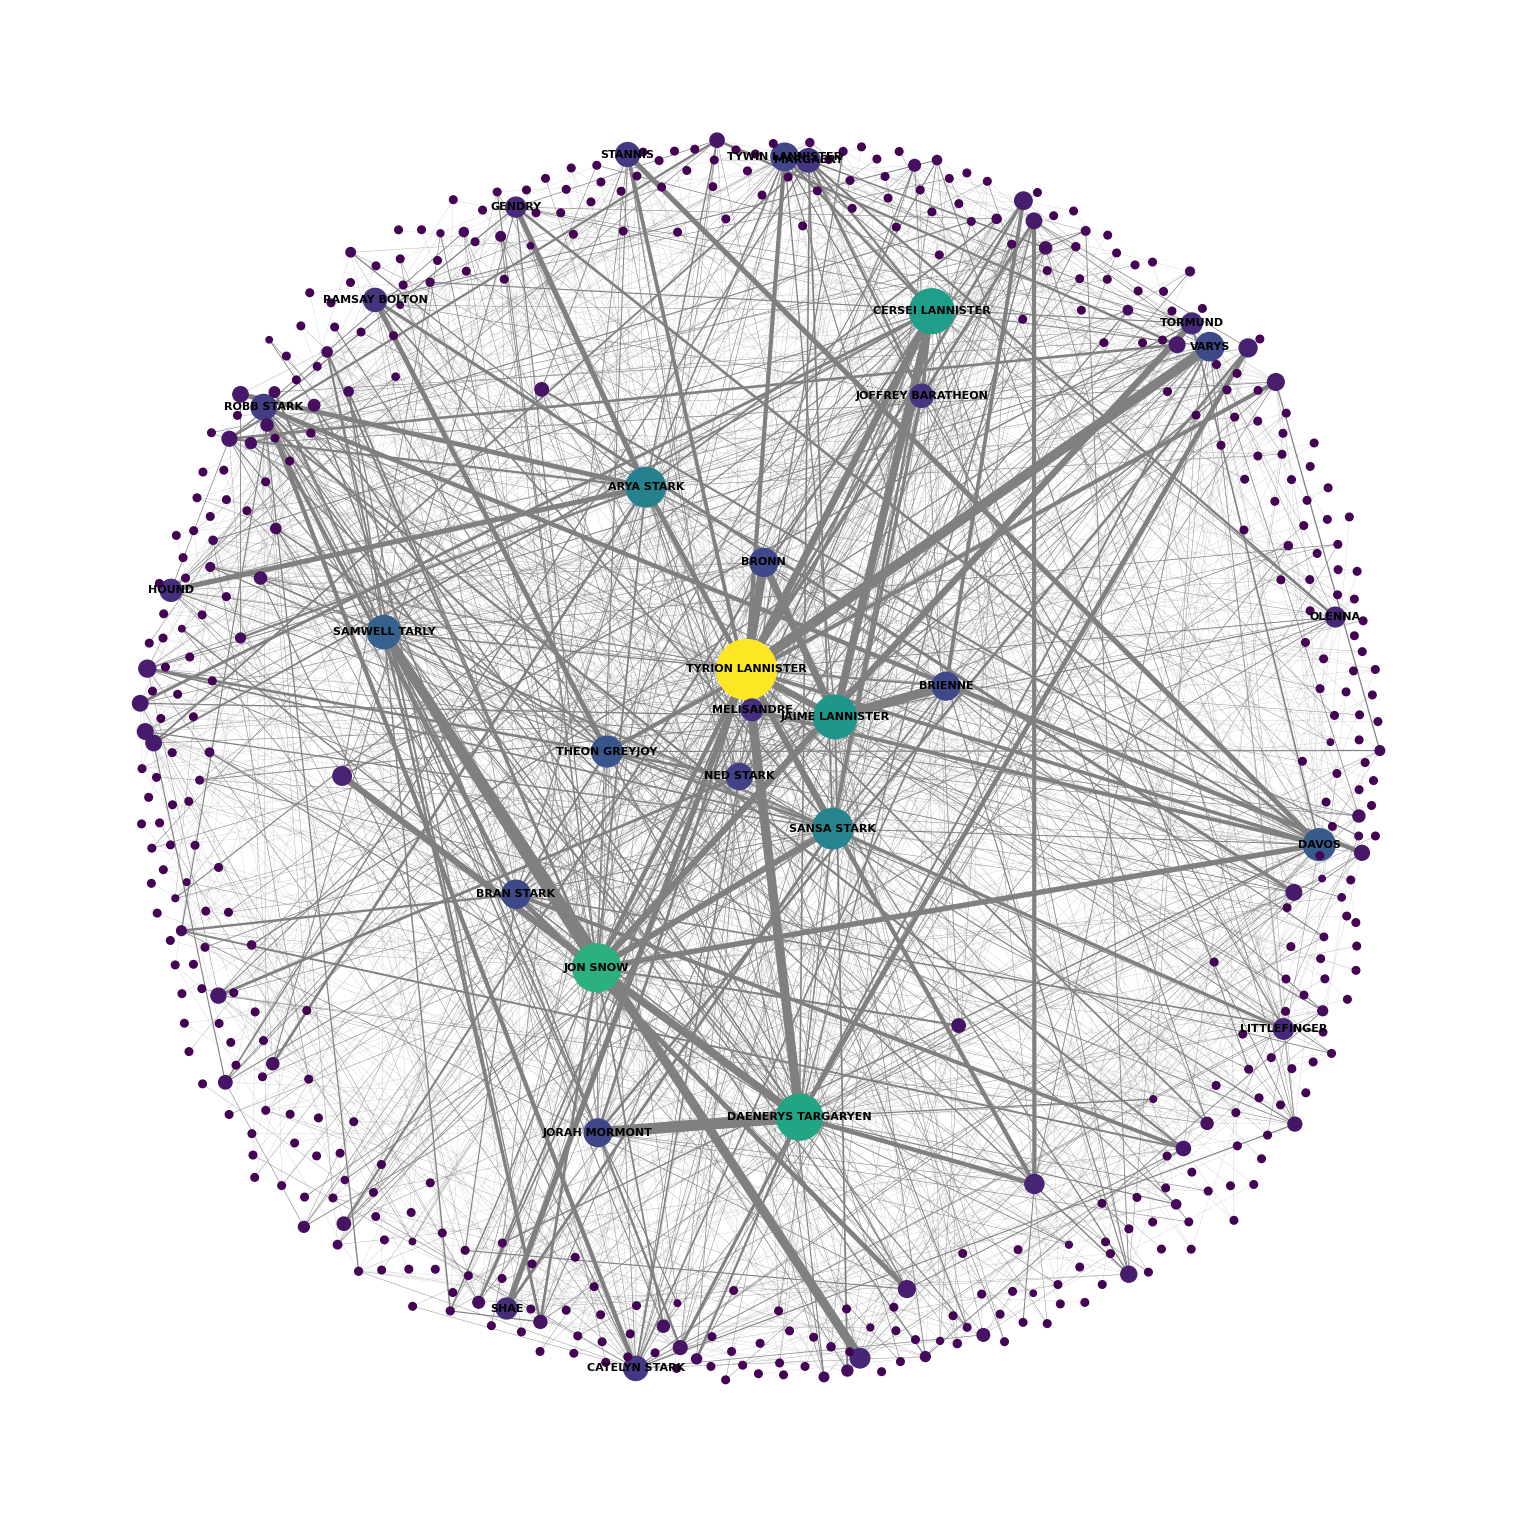

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

for character in characters:
    G.add_node(character['name'], frequency=character['frequency'])

for character in characters:
    connections = character['connections']
    for connection in connections:
        G.add_edge(character['name'], connection, weight=connections[connection])

node_sizes = []
for n, attrs in G.nodes(data=True):
    if 'frequency' in attrs:
        node_sizes.append(attrs['frequency'])
    else:
        node_sizes.append(30)

# pega os primeiro nodes que são os mais frequentes
nodes_to_label = list(G.nodes())[:30]

# cria um dicionário com os nomes dos nodes que serão rotulados
labels = {node: node for node in nodes_to_label}

# define a largura das arestas
edge_widths = [G[u][v]['weight'] / 10 for u, v in G.edges()]

# define a cor dos nodes
max_weight = max([attrs['frequency'] if 'frequency' in attrs else 0 for n, attrs in G.nodes(data=True)])
node_colors = []
for n, attrs in G.nodes(data=True):
    if 'frequency' in attrs:
        node_colors.append(plt.cm.viridis(G.nodes[n]['frequency']/max_weight))
    else:
        node_colors.append(plt.cm.viridis(0))


plt.figure(figsize=(15,15))
# plt.figure(figsize=(20,20))
# plt.figure(figsize=(30,30))
# plt.figure(figsize=(50,50))
# plt.figure(figsize=(100,100))
pos = nx.spring_layout(G, k=3, scale=20)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=node_sizes, edge_color='grey', width=edge_widths, font_size=8, labels=labels, node_color=node_colors)
plt.show()




In [13]:
# for key in episodios.keys():
#     print_episode(episodios[key])

# episodios.keys()

print_episode(episodios['got_s07e02'])

EPISODE 2 - STORMBORN

TITLE SEQUENCE

EXT. DRAGONSTONE - BEACH

A storm rages. Rain falls on the beach and the castle, lightning flashes, and thunder crackles overhead. DAENERYS TARGARYEN, TYRION LANNISTER, GREY WORM, MISSANDEI, and VARYS are standing in the Chamber of the Painted Table, staring out at the storm.
TYRION LANNISTER:  On a night like this, you came into the world.
VARYS:  I remember that storm. All the dogs in King's Landing howled through the night.
DAENERYS TARGARYEN:  I wish I could remember it.

DAENERYS turns away from the window and walks over to the table.
DAENERYS TARGARYEN:  I always thought this would be a homecoming. It doesn't feel like home.
TYRION LANNISTER:  We won't stay on Dragonstone for long.
DAENERYS TARGARYEN:  Good.

DAENERYS looks at the figurines placed on the table
DAENERYS TARGARYEN:  Not so many lions.
VARYS:  Cersei controls fewer than half the Seven Kingdoms. The lord of Westeros despise her. Even before your arrival, they plotted against her